In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [14]:
# Загрузка данных
df = pd.read_csv('comments.csv')
df

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0
...,...,...,...,...,...
18404,18404,cyLWtMSry58,I really like the point about engineering tool...,0.0,2.0
18405,18405,cyLWtMSry58,I’ve just started exploring this field. And th...,20.0,2.0
18406,18406,cyLWtMSry58,Excelente video con una pregunta filosófica pr...,1.0,1.0
18407,18407,cyLWtMSry58,"Hey Daniel, just discovered your channel a cou...",35.0,2.0


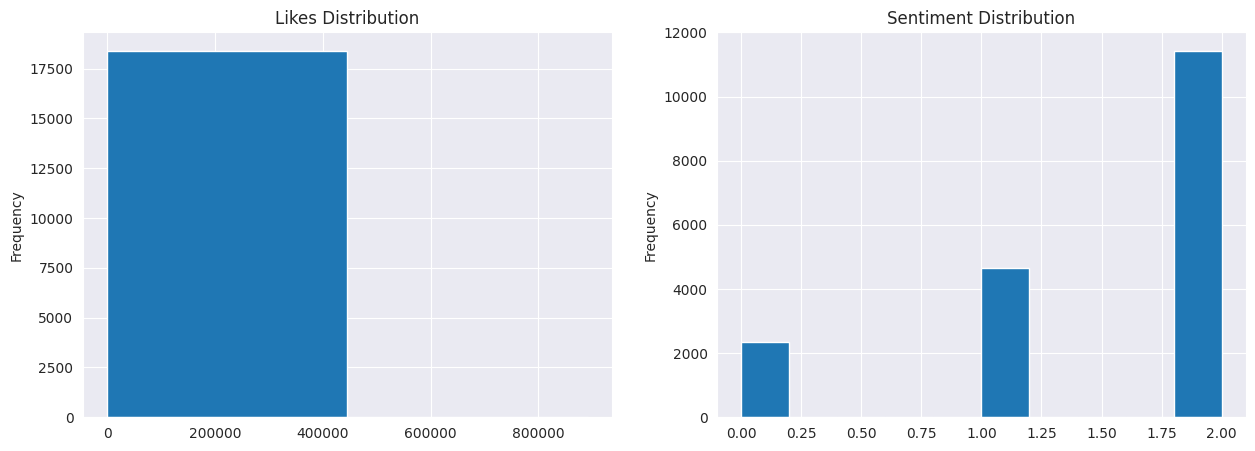

In [15]:
# Визуализация распределения значений предикторов
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df['Likes'].plot(kind='hist', bins=2, ax=axes[0], title='Likes Distribution')
df['Sentiment'].plot(kind='hist', ax=axes[1], title='Sentiment Distribution')
plt.show()

In [16]:
# Векторизация текста с использованием Word2Vec
comments = [str(comment).split() for comment in df['Comment']]
w2v_model = Word2Vec(sentences=comments, vector_size=100, window=5, min_count=1, workers=4)

In [17]:
w2v_vectors = [w2v_model.wv[comment].mean(axis=0) for comment in comments]
w2v_vectors

[array([ 0.06325141,  0.20956542,  0.11212171,  0.19395915,  0.16025835,
        -1.4356056 ,  0.38752094,  1.608737  , -0.26067522, -1.0104073 ,
         0.41714084, -1.1320609 , -0.33938056,  0.7777866 ,  0.5152758 ,
        -0.42497042,  0.13435349, -0.18971966, -0.57882285, -1.2941908 ,
         0.37859964,  0.20097215,  0.57422847, -0.7049483 ,  0.18496335,
        -0.55224997, -0.51413083, -0.5223905 , -0.34742552,  0.3913313 ,
         0.6596522 ,  0.10390236,  0.89786553, -1.2372785 , -0.4292479 ,
         0.37324843,  0.11408281, -0.3166678 , -0.0789794 , -0.78004014,
         0.48880354, -0.52131957, -0.60962754,  0.18716437,  0.34123886,
         0.097316  , -0.59825474,  0.00214834,  0.37505502,  0.6952935 ,
         0.24213123, -0.96970534,  0.0127607 , -0.4608573 , -0.14310129,
         1.0799387 ,  0.18684112,  0.30425072,  0.32051244,  0.42247316,
         0.5851855 ,  0.0373322 ,  0.6138061 ,  0.03562228, -0.6883111 ,
         0.96884656,  0.09116549,  0.51259965, -0.9

In [18]:
# Добавление векторов к данным
w2v_df = pd.DataFrame(w2v_vectors, columns=[f'w2v_{i}' for i in range(100)])
df = pd.concat([df, w2v_df], axis=1)

In [19]:
df_cleared = df.drop(["Unnamed: 0", "Video ID", "Comment"], axis=1)

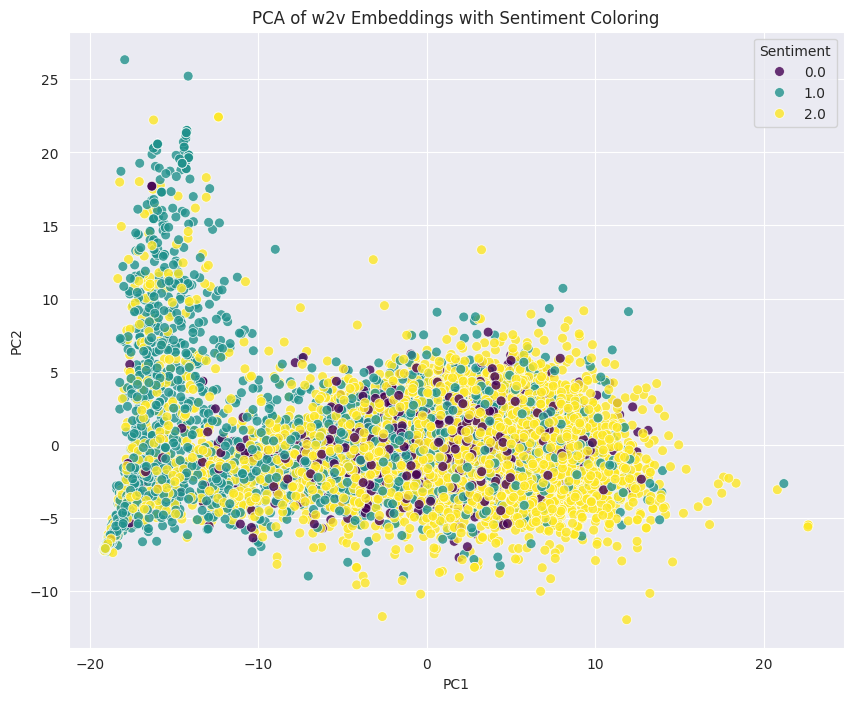

In [30]:
# Разделение данных на обучающий и тестовый наборы
X = df_cleared.drop(['Sentiment'], axis=1)
y = df_cleared['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных перед применением PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Применение PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Создание DataFrame для визуализации
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Sentiment'] = y_train.values

# Визуализация PCA пространства с окраской по Sentiment
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Sentiment', data=pca_df, palette='viridis', s=50, alpha=0.8)
plt.title('PCA of w2v Embeddings with Sentiment Coloring')
plt.legend(title='Sentiment')
plt.show()

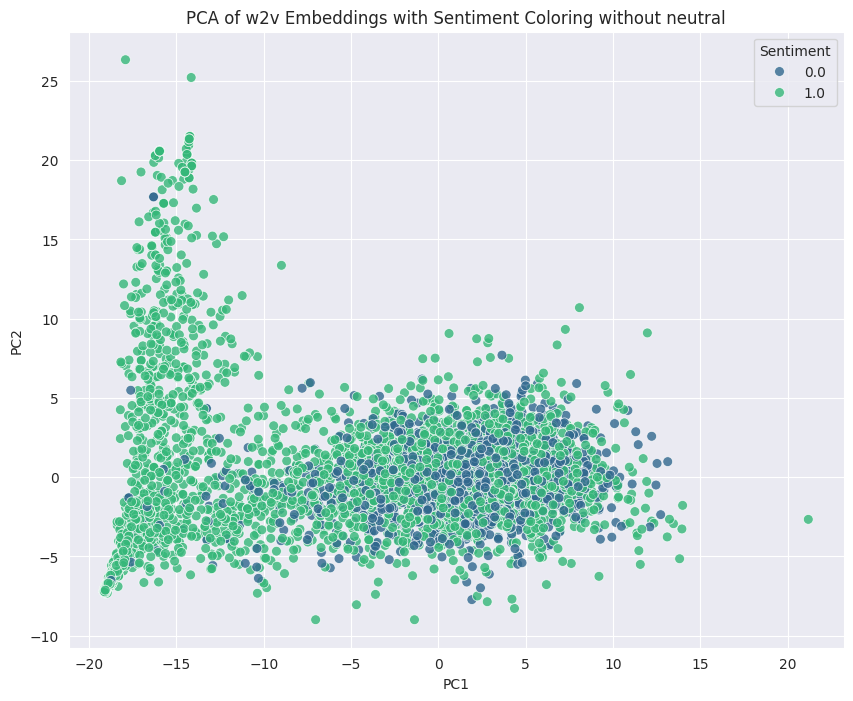

In [32]:
pca_df = pca_df[pca_df['Sentiment'] != 2.0]
# Визуализация PCA пространства с окраской по Sentiment
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Sentiment', data=pca_df, palette='viridis', s=50, alpha=0.8)
plt.title('PCA of w2v Embeddings with Sentiment Coloring without neutral')
plt.legend(title='Sentiment')
plt.show()